In [1]:
import scipy 
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_sequence = 100
sequence_length = 1000
generator = np.random.default_rng(seed=0)

(array([ 2.,  0., 12., 14., 14., 17., 16.,  8.,  9.,  8.]),
 array([-1.16251539, -0.94614422, -0.72977305, -0.51340188, -0.29703072,
        -0.08065955,  0.13571162,  0.35208279,  0.56845396,  0.78482512,
         1.00119629]),
 <BarContainer object of 10 artists>)

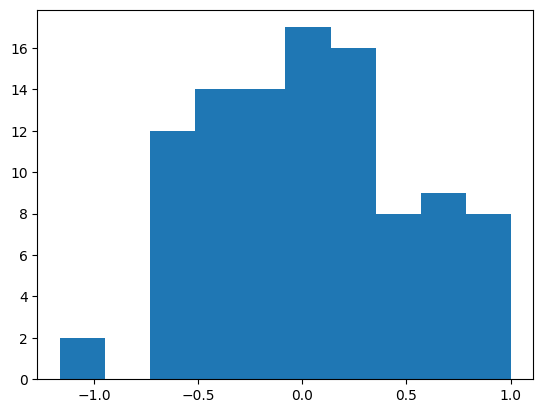

In [3]:
plt.hist(generator.normal(0, 0.5, 100))

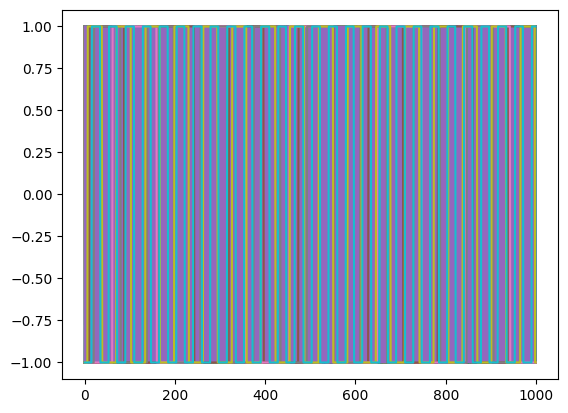

In [4]:
period = np.full(n_sequence, sequence_length/10)
period += 2*(generator.random(n_sequence)-0.5)*period

phase = generator.random(n_sequence)*period
t = np.linspace(phase, sequence_length+phase, sequence_length, endpoint=False).T
control = signal.square(2 * np.pi *((1/period)*t.T).T)

for i in range(n_sequence):
    plt.plot(np.linspace(0, sequence_length, sequence_length, endpoint=False), control[i])

(array([11.,  8.,  9.,  9.,  7., 15.,  5.,  8., 14., 14.]),
 array([  1.28177653,  21.05194584,  40.82211515,  60.59228446,
         80.36245377, 100.13262308, 119.90279239, 139.6729617 ,
        159.44313101, 179.21330032, 198.98346963]),
 <BarContainer object of 10 artists>)

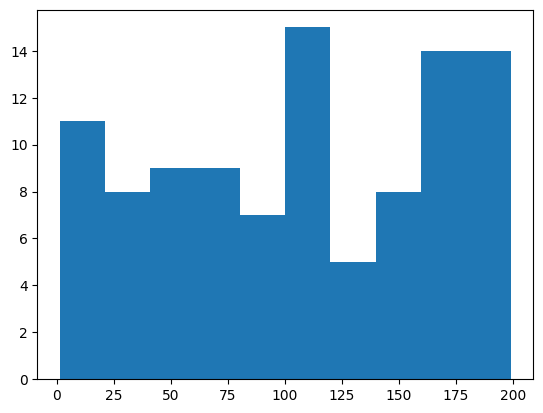

In [5]:
plt.hist(period)

In [ ]:
from world_machine_experiments import  shared
from world_machine_experiments.toy1d import base

from hamilton import driver
import torch


d = driver.Builder().with_modules(base, shared).build()

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

inputs = {"sequence_lenght": 1000,
        "n_sequence": 10000,
        "context_size": 200,
        "state_control":"periodic",
        "seed":0
                       }

In [ ]:
outputs = d.execute(["toy1d_data"], inputs=inputs)

In [9]:
outputs["toy1d_data"]["state_decoded"].shape

(10000, 1000, 3)

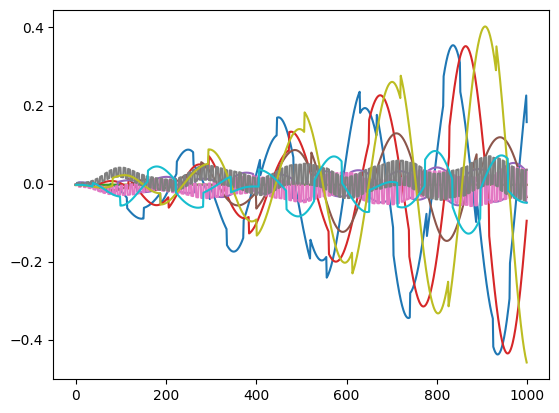

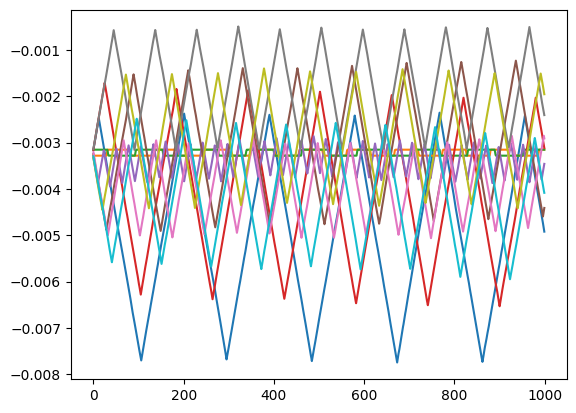

In [10]:
for i in range(10):
    plt.plot(outputs["toy1d_data"]["state_decoded"][i,:,0])
plt.show()



for i in range(10):
    plt.plot(outputs["toy1d_data"]["state_decoded"][i,:,2])
plt.show()


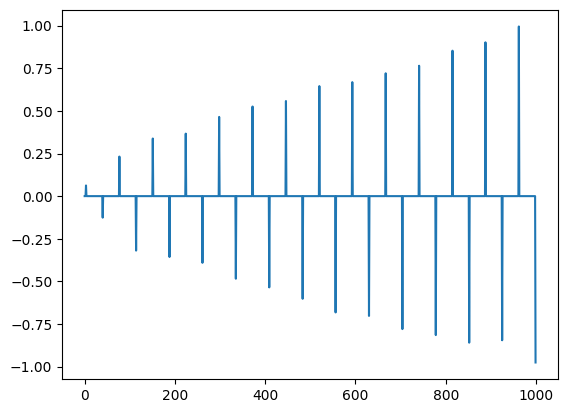

In [11]:
plt.plot(outputs["toy1d_data"]["state_control"][0,:,0])

In [12]:
period = np.full(n_sequence, sequence_length/10)
period += 3*(generator.random(n_sequence)-0.5)*period

phase = generator.random(n_sequence)*period
t = np.linspace(phase, sequence_length+phase,
            sequence_length, endpoint=False).T
control_pulse = signal.square(2 * np.pi * ((1/period)*t.T).T)
control_pulse = (control_pulse-np.roll(control_pulse, 1, 1))/2

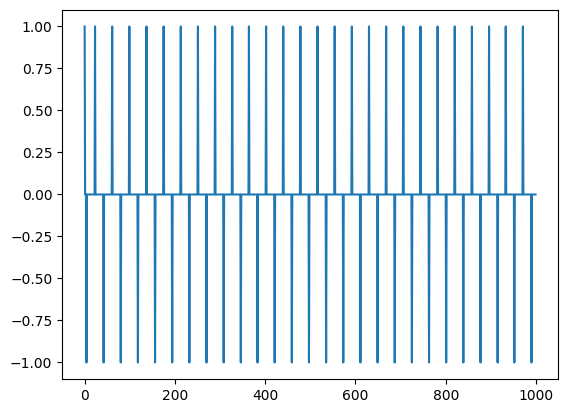

In [13]:
plt.plot(control_pulse[0])

## Eval model

In [1]:
import os

import scipy 
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from hamilton import driver
import torch
from tensordict import TensorDict

from world_machine_experiments import  shared
from world_machine_experiments.toy1d import base


In [2]:
d = driver.Builder().with_modules(base, shared).build()

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'


In [4]:


inputs = {"sequence_lenght": 1000,
            "n_sequence": 10000,
            "context_size": 200,
            "state_dimensions": None,
            "batch_size": 32,
            "device": device,
            "seed":[0, 42],
            "state_control": "periodic",
            "measurement_shift": 0
        }

In [5]:
outputs = d.execute(["toy1d_data", "toy1d_dataloaders"], inputs=inputs)

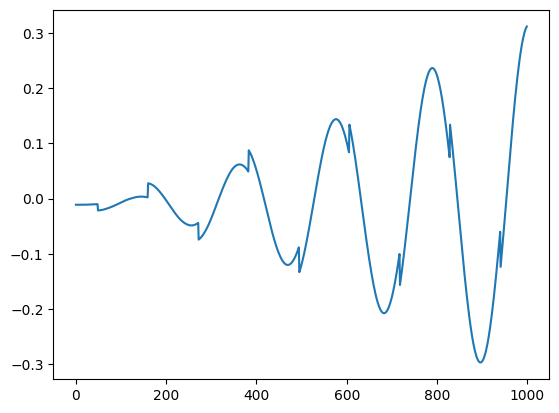

In [6]:
plt.plot(outputs["toy1d_data"]["state_decoded"][3,:,0])

In [7]:
item = next(iter(outputs["toy1d_dataloaders"]["train"]))

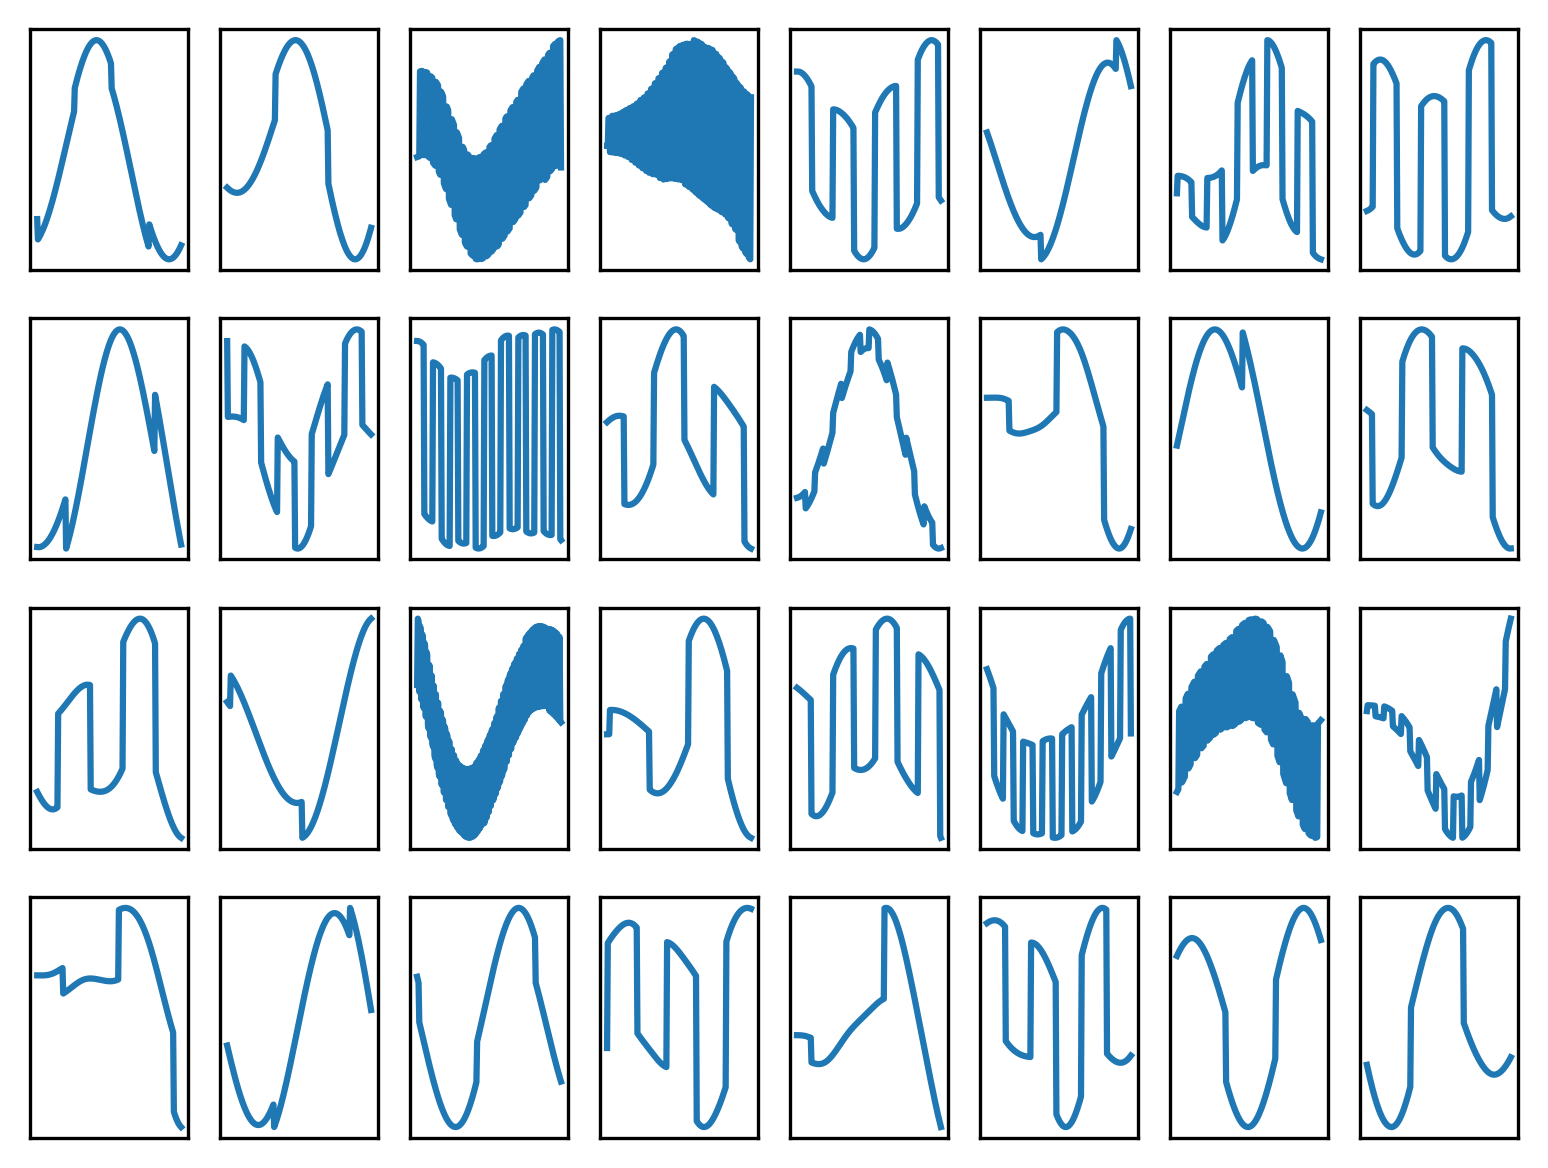

In [8]:
axis = 0
fig, axs = plt.subplots(4, 8, dpi=300)

for i in range(32):
    row = i // 8
    column = i % 8

    axs[row, column].plot(item["targets"]["state_decoded"][i,:,0])


    axs[row, column].set_xticks([])
    axs[row, column].set_yticks([])

plt.show()

In [ ]:
names = [
    #"Base",
    #"M0-90",
    #"NoDiscover_M0-90",
    #"Break1",
    #"Break1_M0-100",
    #"Break1_M0-100_FF",
    #"Break4_M0-100_FF",
    #"2Break1_M0-100_FF",
    #"MLP_Break1_M0-100_FF_TRAINM",
    #"MLP_Break1_M0-100_FF_TRAINM_SS12",
    #"MLP_Break1_M0-100_FF_LTANH",
    #"MLP_Break1_M0or100_FF",
    #"Break1_M0-100_FF_Alibi",
    #"Break1_M0-100_FF_H0x",
    #"Break1_M0-100_FF_TRAINMC_H0x",
    #"SMSM_Break1_M0-100_FF_TRAINMC_SS12_H0x",
    #"SMSM_Break1_M0-100_FF_TRAINM_SS12_H0x",
    #"SMSM_Break1_M0-100_FF_Alibi_TRAINM_SS12_H0x",
    #"Break1_M0-100_FF_3H_SS12",
    #"SM_M0-100_FF_3H_SS12_TrainM_H0x",
    #"SM_Break1_M0-100_FF_3H_SS12_TrainM_H0x",
    #"Break1_M0-100_FF_H0x_SS12_TrainM_STR-MD", #STR-MD = Recall da dimensão M D
    #"Break1_M0-100_FF_H0x_SS12_TrainM_STR5-MD",
    #"Break1_M0-100_FF_H0x_SS12_TrainM_STR10-MD",
    #"M0-100_FF_H0x_SS12_TrainM_STR5-MD",
    #"Break1_M0-100_FF_H0x_SS12_TrainM_STR-MD_StateReg",
    #"Break1_M0-100_StateReg",
    #"Break1_M0-100_FF_H0x_SS12_TrainM_STR5-MD_StateReg",
    #"Break1_M0-100_FF_H0x_SS4_TrainM_STR5-MD_StateReg",
    #"Break1_M0-100_FF_H0x_SS12_TrainM_STR5W-MD",
    #"Break1_M0-100_FF_H0x_SS12_TrainM_STR5W-MD_SGD",
    #"Break1_M0-100_FF_H0x_SS12_TrainM_STR5W-MD_SGD2",
    #"Break1_M0-100_FF_H0x_SS12_TrainM_STR5W-MD_SGD3",
    #"Break8_M0-100_FF_H0x_SS12_TrainM_STR5-MD",
    #"Break1_M0-100_FF_H0x_SCheckSensorial",
    "Break1_M0-100_FF_H0x_Alibi", 
    #"Break1_M0-100_FF_H0x_Sine",
    #"Break1_M0-100_FF_H0x_Alibi_SCR01",
    #"Break1_M0-100_FF_H0x_Alibi_SCR001",
    #"Break1_M0-100_FF_H0x_Alibi_SCR1e-3",
    #"Break1_M0-100_FF_H0x_Alibi_SCR1e-4",
    #"Break1_M0-100_FF_H0x_Alibi_SCR1e-5",
    #"Break1_M0-100_FF_H0x_SS128_Alibi", 
    #"Break1_M0-100_FF_H0x_SS512_Alibi", 
    "Break1_M0-100_FF_H0x_SS128_Alibi_SCheckSensorial", 
    #"Break1_M0-100_FF_H0x_SS512v_SCheckSensorial",
    #"Break1_M0-100_FF_H0x_SS128_Alibi_SCheckSensorial_Head2", 
    "Break1_M0-100_FF_H0x_SS128_Alibi_SCheckSensorial_Head4", 
    #"Break1_M0-100_FF_H0x_SS128_Alibi_SCheckSensorial_Head8",
    "Break1_M0-100_FF_H0x_SS128_Alibi_SCheckSensorial_Head4_STR5-MD", 
    #"Break1_M0-100_FF_H0x_SS128_Alibi_SCheckSensorial_Head4_STR5-MD_StateReg", 
    #"Break1_M0-100_FF_H0x_SS128_Alibi_SCheckSensorial_Head4_StateReg", 
    #"Break2_M0-100_FF_H0x_SS128_Alibi_SCheckSensorial_Head4",
    #"Break2_M0-100_FF_H0x_SS128_Alibi_SCheckSensorial_Head4_STR5-MD",
    #"Break1_M0-100_FF_H0x_SS128_SCheckSensorial_Head4_STR5-MD",
    #"Break1_M0-100_H0x_SS128_Alibi_SCheckSensorial_Head4_STR5-MD",
    #"M0-100_H0x_SS128_Alibi_SCheckSensorial_Head4",
    "Break1_M0-100_FF_H0x_SS256_Alibi_SCheckSensorial_Head4",
]

long = True
long2 = True

if long2:
    n_epoch = 15
    experiment_path = "toy1d_memory_long3"
elif long:
    n_epoch = 20
    experiment_path = "toy1d_memory_long2"
else:
    n_epoch = 5
    experiment_path = "toy1d_memory"

models = {}
for name in names:
    try:
        models[name] = torch.load(os.path.join(experiment_path, name, "run_0","toy1d_model.pt"))
    except:
        pass



try:
    models["NoDiscover_M0-90_NoDecoded"] = models["NoDiscover_M0-90"]
except:
    pass


for name in models:
    models[name].eval()
    models[name].to(device)

torch.set_grad_enabled(False)

len(models)

C:\Users\eltsu\AppData\Local\Temp\ipykernel_42476\2133081448.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  models[name] = torch.load(os.path.join(experiment_path, nam

1

In [429]:
models = {}

name = "Break1_M0-100_FF_H0x_SS128_Alibi_SCheckSensorial_Head4" 
experiment_path = "toy1d_memory_long3"
models[name] = torch.load(os.path.join(experiment_path, name, "run_0","toy1d_model.pt"))

name = "Break1_M0-100_FF_H0x_SS128_Alibi_SCheckSensorial_Head4_STR5-MD"
experiment_path = "toy1d_memory_long2"
models[name] = torch.load(os.path.join(experiment_path, name, "run_0","toy1d_model.pt"))

C:\Users\eltsu\AppData\Local\Temp\ipykernel_42476\3912304802.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  models[name] = torch.load(os.path.join(experiment_path, name

In [430]:
models.keys()

dict_keys(['Break1_M0-100_FF_H0x_SS128_Alibi_SCheckSensorial_Head4', 'Break1_M0-100_FF_H0x_SS128_Alibi_SCheckSensorial_Head4_STR5-MD'])

In [431]:
inputs: torch.Tensor = item["inputs"].to(device)
targets: torch.Tensor = item["targets"]["state_decoded"].to(
    device)

if "state_decoded" in inputs:
    batch_size = inputs["state_decoded"].shape[0]
    seq_len = inputs["state_decoded"].shape[1]

state = {}

for model_name in models:
    state_size = models[model_name]._state_size
    state[model_name] = torch.rand((batch_size, seq_len, state_size), device=device)
    state[model_name] = (2*state[model_name])-1
    state[model_name][:, 0, :] = 0

sensorial_masks = None

for i in range(seq_len):
    logits = {}
    for name in models:
        
        if name == "NoDiscover_M0-90":
            state_decoded = inputs["state_decoded"]
        else:
            state_decoded = None

        logits[name] = models[name](
            state=state[name], 
            state_decoded=state_decoded,
            sensorial_data=inputs, sensorial_masks=sensorial_masks)

        if i != seq_len-1:
            state[name][:, i+1] = logits[name]["state"][:, i]

In [432]:
logits = {name:logits[name].cpu() for name in logits}

In [433]:
seq_to_plot = 2

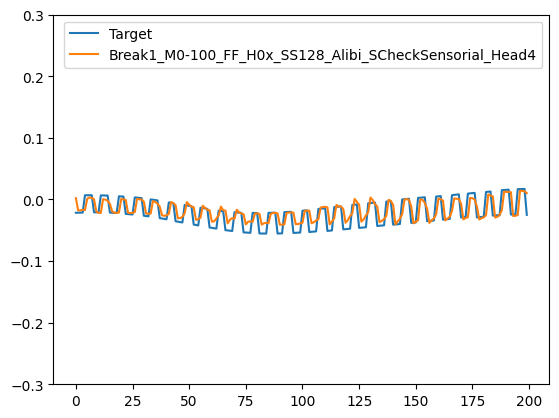

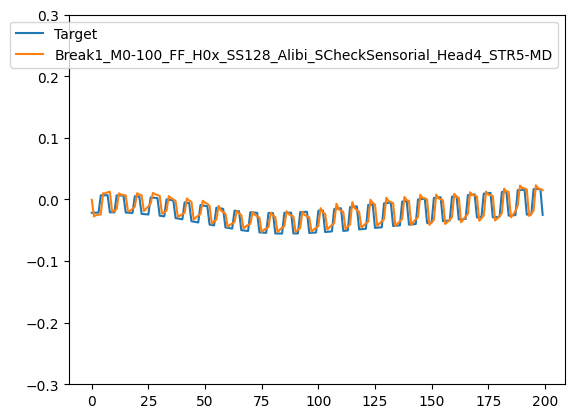

In [434]:
for name in logits:
    plt.plot(item["targets"]["state_decoded"][seq_to_plot,:,0], label="Target")

    plt.plot(logits[name]["state_decoded"][seq_to_plot,:,0], label=name)


    plt.ylim(-0.3, 0.3)

    plt.legend()

    plt.show()

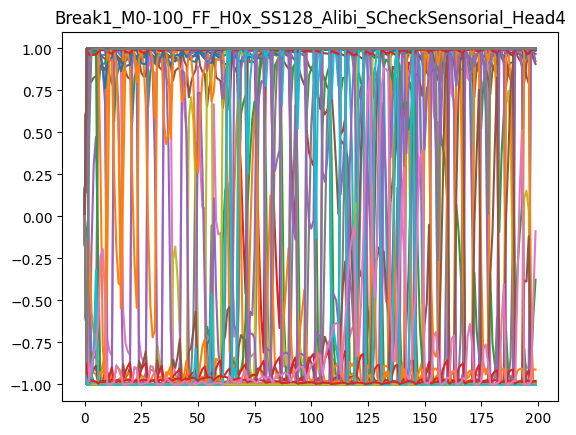

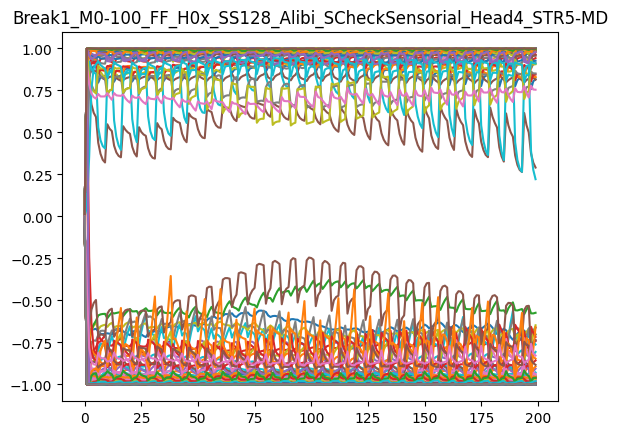

In [435]:
for name in logits:

    plt.plot(state[name][seq_to_plot].cpu(), label=name)
    
    plt.title(name)
    #plt.legend()

    plt.show()


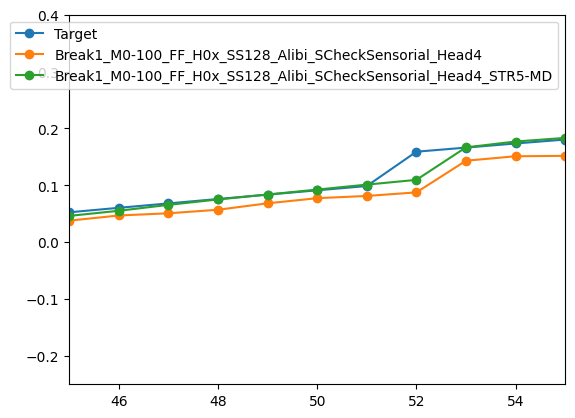

In [436]:
plt.plot(item["targets"]["state_decoded"][0,:,0], "o-", label="Target")
for name in logits:
    plt.plot(logits[name]["state_decoded"][0,:,0], "o-", label=name)

plt.xlim(45,55)
plt.ylim(-0.25, 0.4)
plt.legend()

In [437]:
state_half = {name:state[name][:, 100:].clone() for name in state}

sensorial_masks = None

inputs_half = {}

for name in inputs.keys():
    inputs_half[name] = inputs[name][:, 100:].clone()

inputs_half = TensorDict(inputs_half)

for i in range(100):
    logits_half = {}
    for name in models:
        if name == "NoDiscover_M0-90":
            state_decoded = inputs["state_decoded"]
        else:
            state_decoded = None

        logits_half[name] = models[name](
            state=state_half[name],
            state_decoded=state_decoded,
            sensorial_data=inputs_half, sensorial_masks=sensorial_masks, input_sequence_size=100)

        if i != 100-1:
            state_half[name][:, i+1] = logits_half[name]["state"][:, i]

logits_half = {name:logits_half[name].cpu() for name in logits_half}

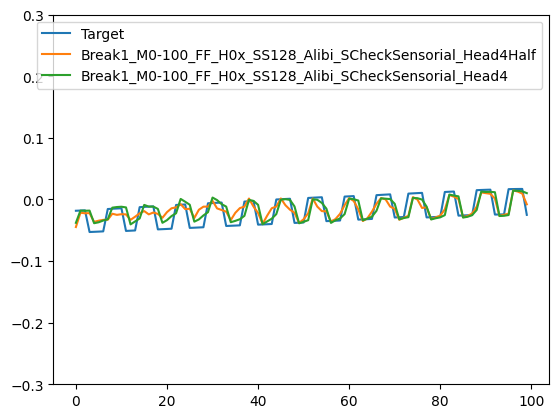

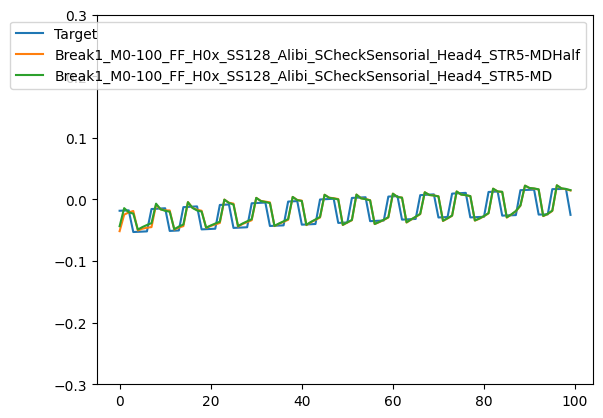

In [438]:
for name in logits:

    plt.plot(item["targets"]["state_decoded"][seq_to_plot,100:,0], label="Target")

    plt.plot(logits_half[name]["state_decoded"][seq_to_plot,:,0], label=name+"Half")

    plt.plot(logits[name]["state_decoded"][seq_to_plot,100:,0], label=name)

    plt.ylim(-0.3, 0.3)

    plt.legend()

    plt.show()


In [439]:
sensorial_masks_half_masked = TensorDict(
                        device=device, batch_size=batch_size)

sensorial_data: TensorDict = inputs
for name in sensorial_data.keys():
    sensorial_masks_half_masked[name] = torch.zeros(
        (batch_size, 100), dtype=bool, device=device)

In [440]:
state_half_masked = {name:state[name][:, 100:].clone() for name in state}

inputs_half_masked = {}

for name in inputs.keys():
    inputs_half_masked[name] = inputs[name][:, 100:].clone()

inputs_half_masked = TensorDict(inputs_half_masked)

for i in range(100):
    logits_half_masked = {}
    for name in models:
        if name == "NoDiscover_M0-90":
            state_decoded = inputs["state_decoded"]
        else:
            state_decoded = None


        logits_half_masked[name] = models[name](
            state=state_half_masked[name],
            state_decoded=state_decoded,
            sensorial_data=inputs_half_masked, sensorial_masks=sensorial_masks_half_masked, input_sequence_size=100)

        if i != 100-1:
            state_half_masked[name][:, i+1] = logits_half_masked[name]["state"][:, i]

logits_half_masked = {name:logits_half_masked[name].cpu() for name in logits_half_masked}

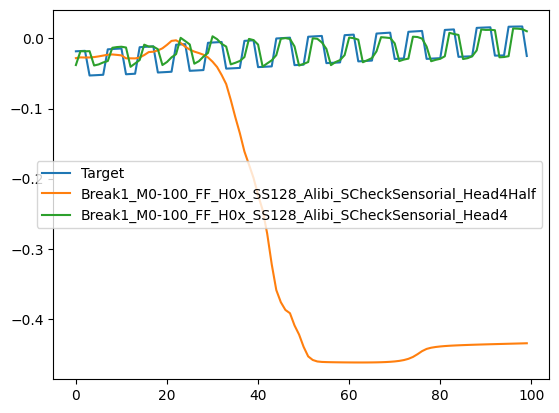

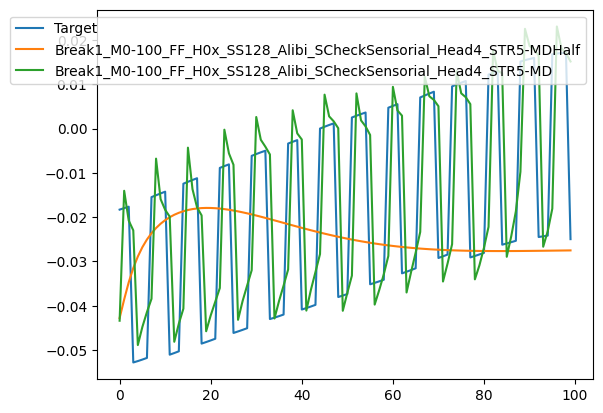

In [441]:
for name in logits:

    plt.plot(item["targets"]["state_decoded"][seq_to_plot,100:,0], label="Target")

    plt.plot(logits_half_masked[name]["state_decoded"][seq_to_plot,:,0], label=name+"Half")

    plt.plot(logits[name]["state_decoded"][seq_to_plot,100:,0], label=name)

    plt.legend()
    #plt.ylim(-0.3, 0.3)

    plt.show()


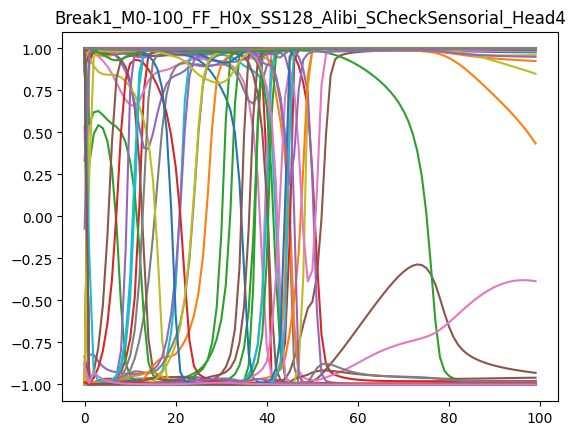

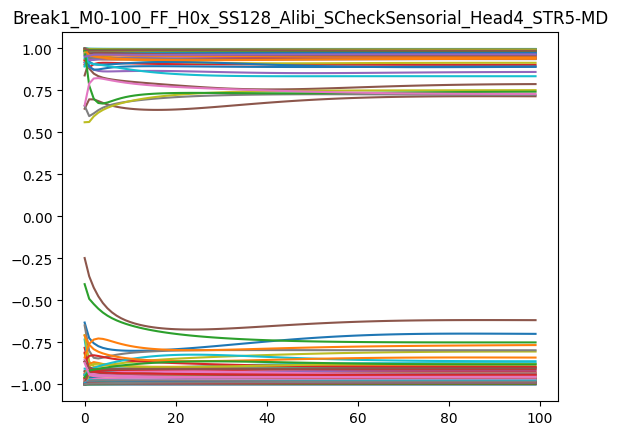

In [442]:
for name in logits:

    plt.plot(state_half_masked[name][seq_to_plot].cpu(), label=name)
    plt.title(name)
    #plt.legend()

    plt.show()


In [443]:
sensorial_masks_masked = TensorDict(
                        device=device, batch_size=batch_size)

sensorial_data: TensorDict = inputs
for name in sensorial_data.keys():
    sensorial_masks_masked[name] = torch.zeros(
        (batch_size, seq_len), dtype=bool, device=device)

    #sensorial_masks_masked[name] = (torch.sin(torch.linspace(0, 200, 200)) > 0).repeat((batch_size, 1))


In [444]:
state_masked = {name:state[name].clone() for name in state}

for i in range(100, seq_len):
    logits_masked = {}
    for name in models:
        if name == "NoDiscover_M0-90":
            state_decoded = inputs["state_decoded"]
        else:
            state_decoded = None


        logits_masked[name] = models[name](
            state=state_masked[name],
            state_decoded=state_decoded,
            sensorial_data=inputs, sensorial_masks=sensorial_masks_masked)

        if i != seq_len-1:
            state_masked[name][:, i+1] = logits_masked[name]["state"][:, i]

logits_masked = {name:logits_masked[name].cpu() for name in logits_masked}

In [445]:
seq_to_plot = 2

In [446]:
def resize(sequence):
    min = torch.min(sequence, dim=1)[0]
    max = torch.max(sequence, dim=1)[0]

    return (sequence-min.unsqueeze(1))/((max-min).unsqueeze(1))

In [447]:
mse_loss = torch.nn.MSELoss()

loss_both_all = {}
loss_use_state_all = {}
loss_prediction_all = {}

for name in logits:
    loss_use_state = mse_loss(resize(logits_masked[name]["state_decoded"][:, :100, 0]), resize(item["targets"]["state_decoded"][:, :100, 0])).cpu().item()
    loss_prediction = mse_loss(resize(logits_masked[name]["state_decoded"][:, 100:, 0]), resize(item["targets"]["state_decoded"][:, 100:, 0])).cpu().item()
    loss_both = mse_loss(resize(logits_masked[name]["state_decoded"][:,:, 0]), resize(item["targets"]["state_decoded"][:, :, 0])).cpu().item()

    loss_both_all[name] = loss_both
    loss_use_state_all[name] = loss_use_state
    loss_prediction_all[name] = loss_prediction

    print(name, loss_both, loss_use_state, loss_prediction)

Break1_M0-100_FF_H0x_SS128_Alibi_SCheckSensorial_Head4 0.1352747678756714 0.036080434918403625 0.1999649554491043
Break1_M0-100_FF_H0x_SS128_Alibi_SCheckSensorial_Head4_STR5-MD 0.10836176574230194 0.0346207469701767 0.20499806106090546


In [448]:
dict(sorted(loss_prediction_all.items(), key=lambda item: item[1]))

{'Break1_M0-100_FF_H0x_SS128_Alibi_SCheckSensorial_Head4': 0.1999649554491043,
 'Break1_M0-100_FF_H0x_SS128_Alibi_SCheckSensorial_Head4_STR5-MD': 0.20499806106090546}

In [449]:
mse_loss = torch.nn.MSELoss(reduction="none")

model_name = "Break1_M0-100_FF_H0x_SS128_Alibi_SCheckSensorial_Head4" #'Break1_M0-100_FF_H0x_SS128_Alibi_SCheckSensorial_Head4_STR5-MD'

loss = mse_loss(resize(logits_masked[model_name]["state_decoded"][:, 100:, 0]), resize(item["targets"]["state_decoded"][:, 100:, 0]))

torch.argmin(torch.mean(loss, dim=1))



tensor(30)

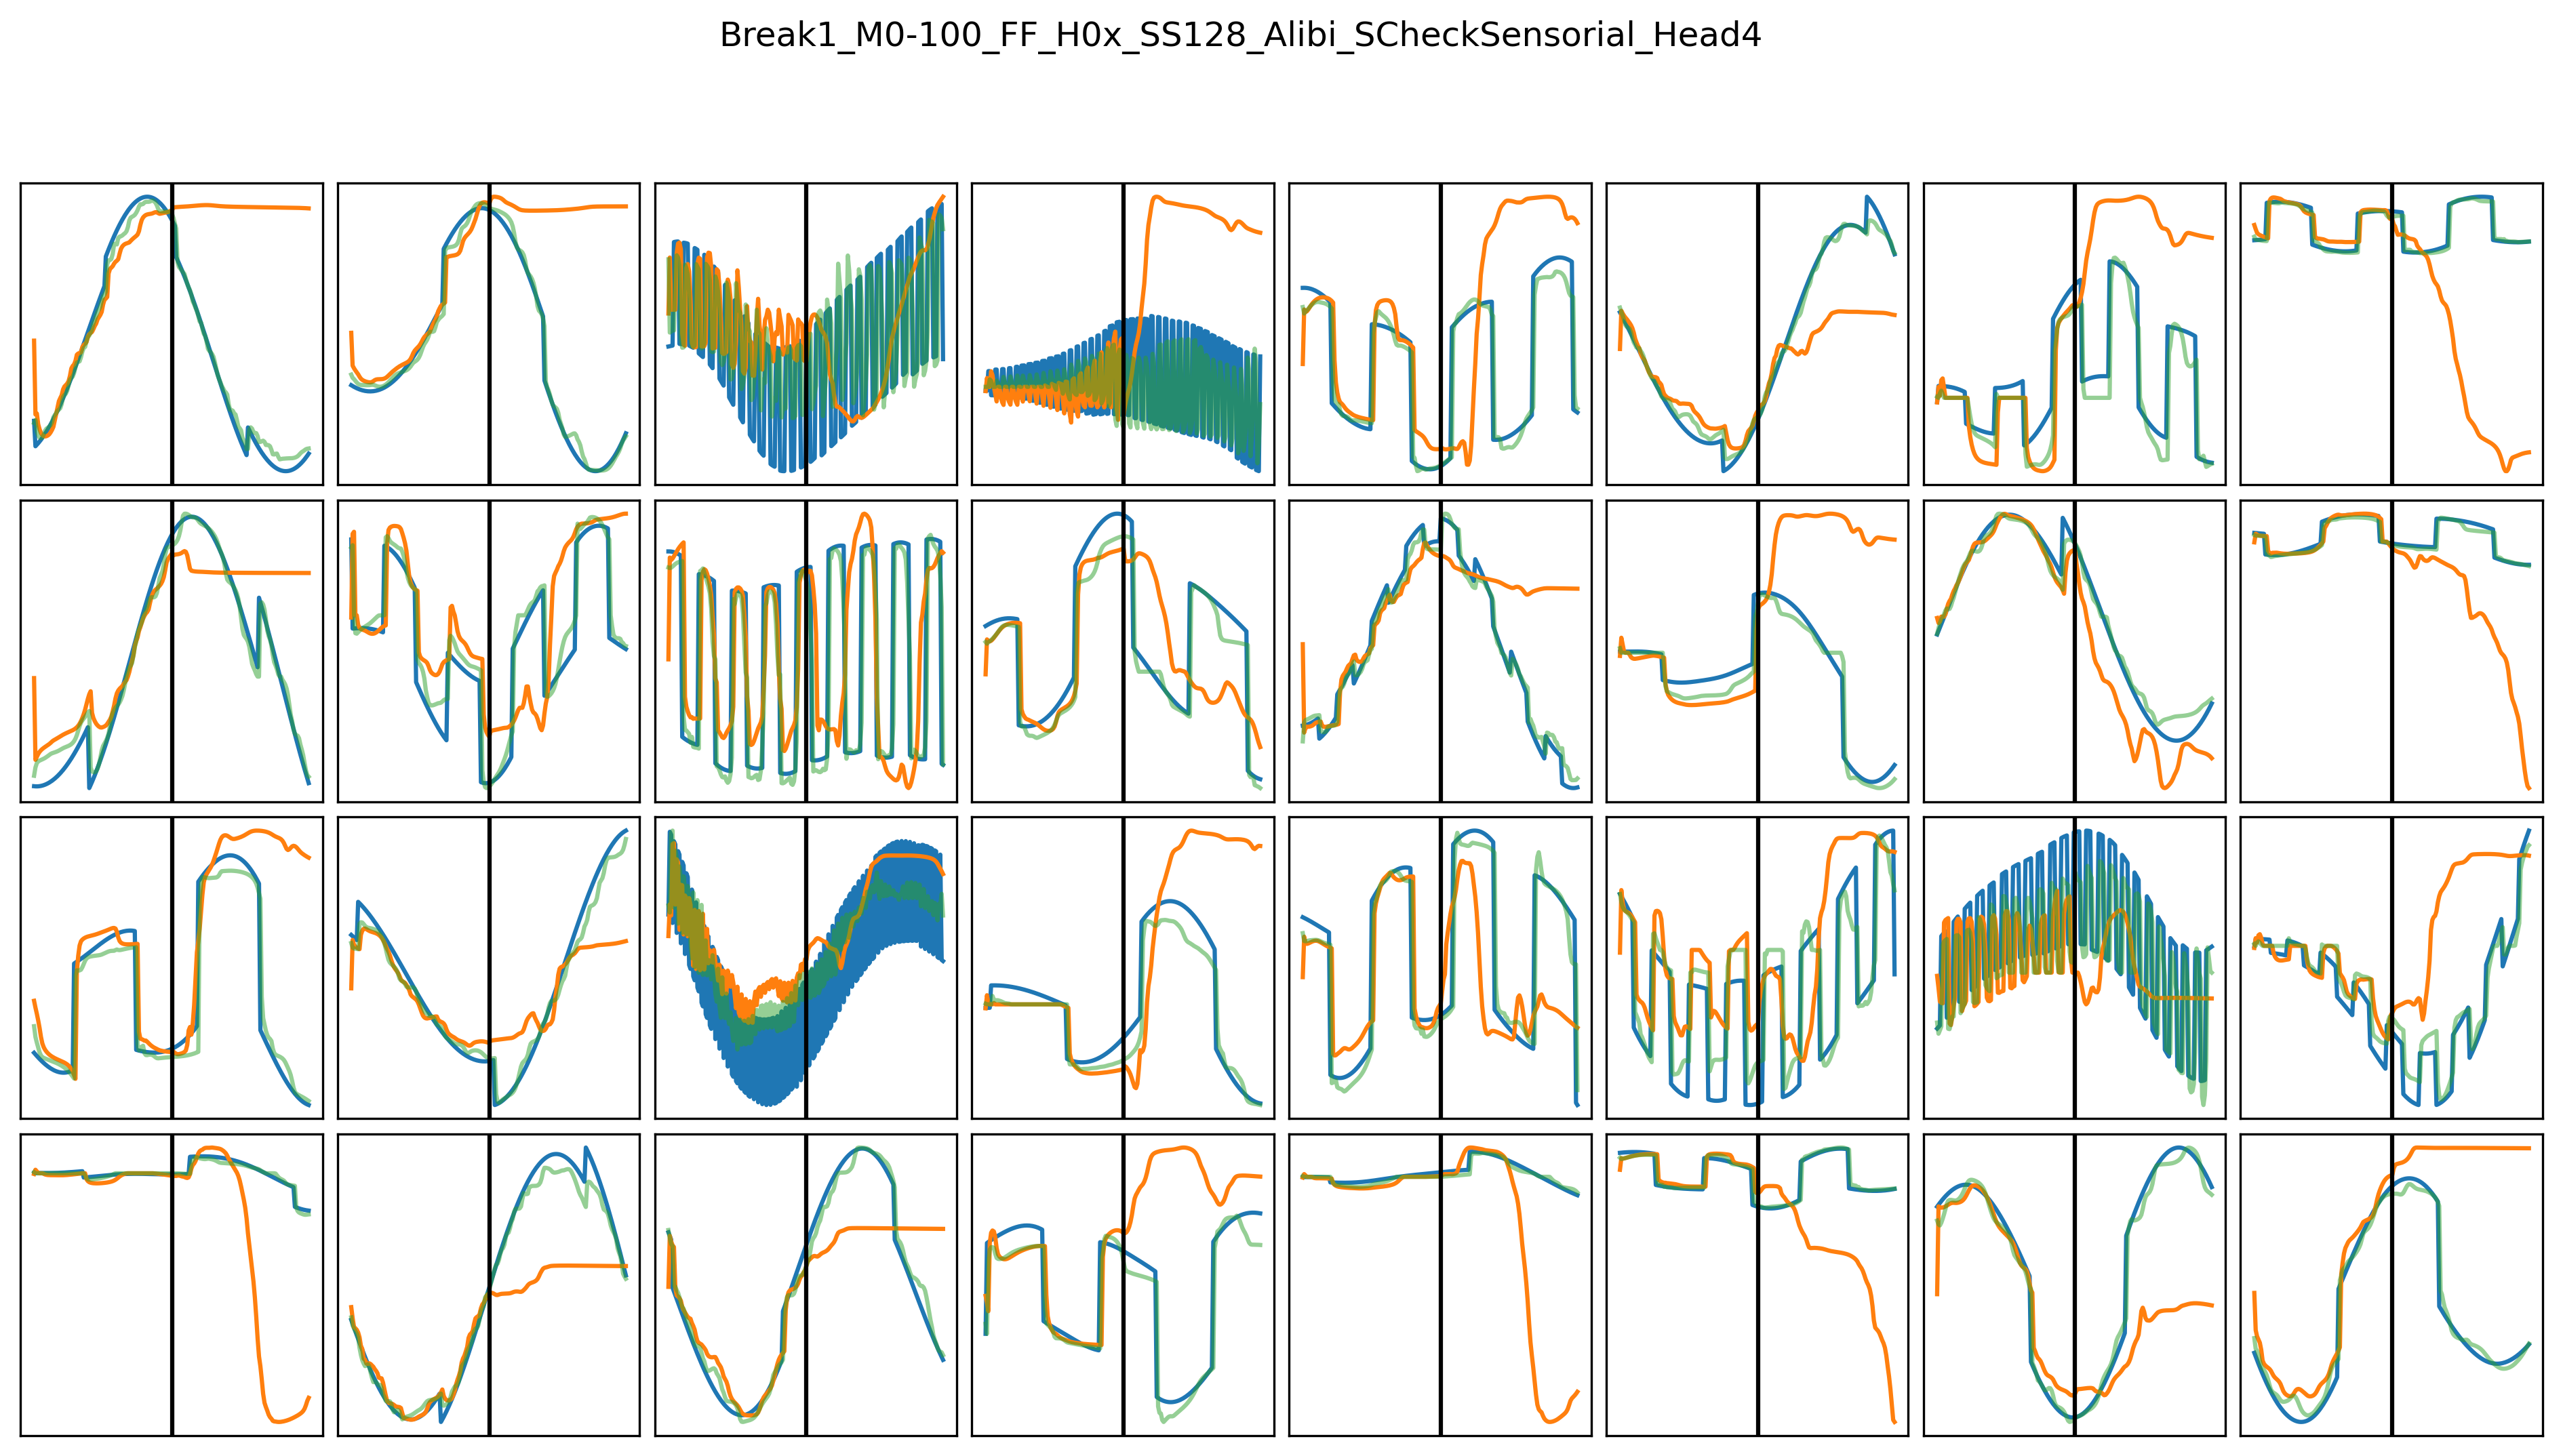

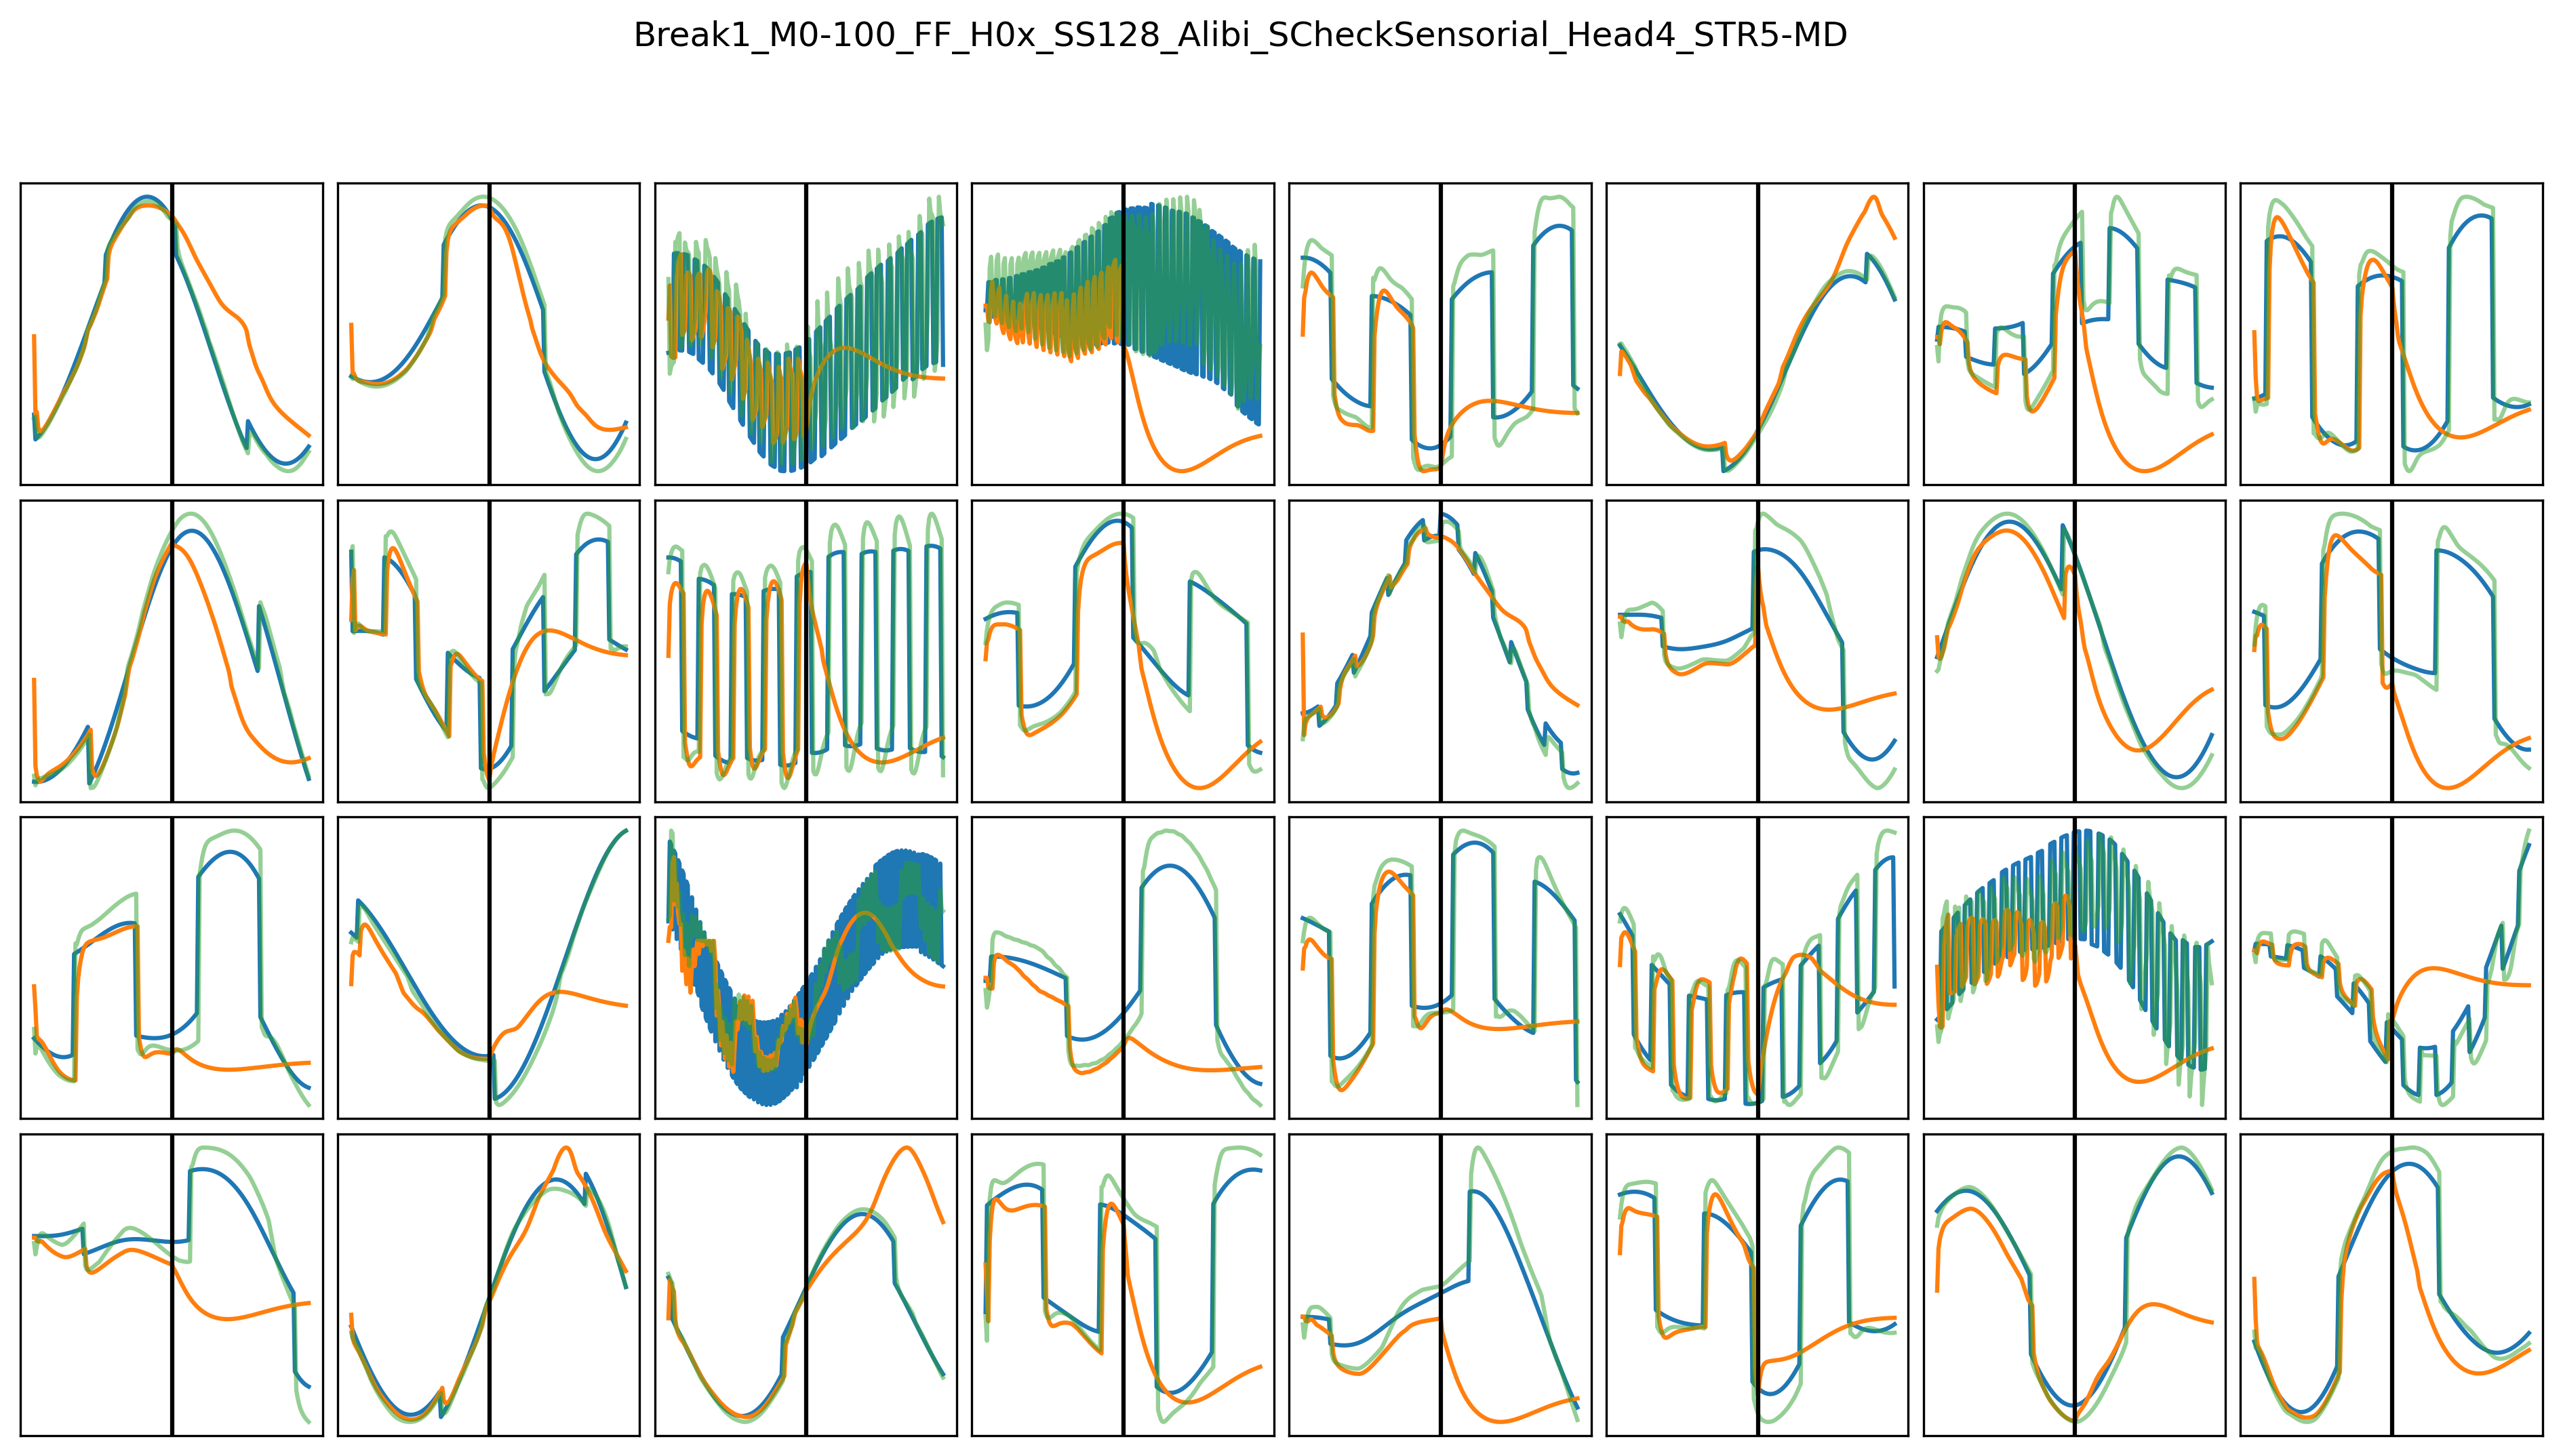

In [450]:
for name in logits:
    axis = 0
    fig, axs = plt.subplots(4, 8, dpi=300, figsize=(16, 8))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=0.05)

    for i in range(32):
        row = i // 8
        column = i % 8

        axs[row, column].plot(item["targets"]["state_decoded"][i,:,0], label="Target")

        axs[row, column].plot(logits_masked[name]["state_decoded"][i,:,0], label=name+"Masked")

        axs[row, column].plot(logits[name]["state_decoded"][i,:,0], label=name, alpha=0.5)

        axs[row, column].set_xticks([])
        axs[row, column].set_yticks([])

        axs[row, column].axvline(100, color="black")

    #plt.legend()
    #plt.ylim(-0.3, 0.3)
    plt.suptitle(name)

    plt.show()


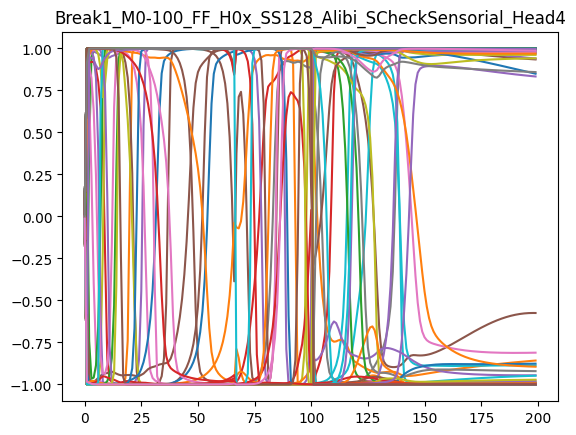

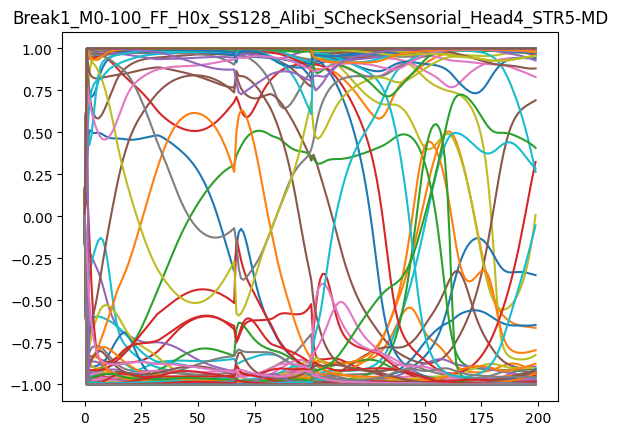

In [455]:
for name in logits:

    plt.plot(state_masked[name][25].cpu(), label=name)
    
    plt.title(name)
    #plt.legend()

    plt.show()


In [452]:
for name in models:
    print(name, end="| ")
    for i in range(2):
        try:
            print(models[name]._blocks[i].block.attention.attention._positional_encoder._m_activation(models[name]._blocks[i].block.attention.attention._positional_encoder._m).cpu(), end="| ")
        except:
            pass
    print()

Break1_M0-100_FF_H0x_SS128_Alibi_SCheckSensorial_Head4| tensor([0.2500, 0.0625, 0.0156, 0.0039])| tensor([0.2500, 0.0625, 0.0156, 0.0039])| 
Break1_M0-100_FF_H0x_SS128_Alibi_SCheckSensorial_Head4_STR5-MD| tensor([0.2500, 0.0625, 0.0156, 0.0039])| tensor([0.2500, 0.0625, 0.0156, 0.0039])| 


Name|m0|m1
-|-|-
Base| 0.023069575428962708| 0.023069575428962708| 
M0-90| 0.027756547555327415| 0.027756547555327415| 
NoDiscover_M0-90| 0.6686981916427612| 0.6686981916427612| 
Break1| 0.06898923963308334| 0.06898923963308334| 
Break1_M0-100| 0.0382746160030365| 0.0382746160030365| 
Break4_M0-100_FF| -1.666601379914842e+18| -1.666601379914842e+18| 
2Break1_M0-100_FF| 0.020985325798392296| 0.020985325798392296| 
MLP_Break1_M0-100_FF_TRAINM| 2.279055118560791| 2.279055118560791| 
MLP_Break1_M0-100_FF_TRAINM_SS12| 0.12778246402740479| 0.12778246402740479| 
MLP_Break1_M0-100_FF_LTANH| 2.250190496444702| 2.250190496444702| 
MLP_Break1_M0or100_FF| 0.020191647112369537| 0.020191647112369537| 
NoDiscover_M0-90_NoDecoded| 0.6686981916427612| 0.6686981916427612| 

In [453]:
for name in models:
    print(name, end="| ")
    for i in range(2):
        try:
            print(models[name]._blocks[i].block.attention.attention._positional_encoder._m.cpu(), end="| ")
        except:
            pass
    print()

Break1_M0-100_FF_H0x_SS128_Alibi_SCheckSensorial_Head4| tensor([0.2500, 0.0625, 0.0156, 0.0039])| tensor([0.2500, 0.0625, 0.0156, 0.0039])| 
Break1_M0-100_FF_H0x_SS128_Alibi_SCheckSensorial_Head4_STR5-MD| tensor([0.2500, 0.0625, 0.0156, 0.0039])| tensor([0.2500, 0.0625, 0.0156, 0.0039])| 


In [454]:
for param in models["Break1_M0-100_FF_H0x"].parameters():
    param = torch.abs(param.cpu())
    if param.numel() != 0:
        print(param.min(), param.max(), param.mean(), param.median())

KeyError: 'Break1_M0-100_FF_H0x'

In [ ]:
from pytorch_probing import Interceptor

In [ ]:
model = models["Break1_M0-100_FF_H0x_Alibi"]
model

WorldMachine(
  (_blocks): ModuleList(
    (0-1): 2 x BlockContainer(
      (block): AdaLNZeroBlock(
        (conditioning_mlp): Sequential(
          (0): SiLU()
          (1): Linear(in_features=6, out_features=36, bias=True)
        )
        (layer_norm1): LayerNorm((6,), eps=1e-05, elementwise_affine=True)
        (modulate1): Modulate()
        (attention): MultiHeadSelfAttention(
          (attention): MultiHeadAttention(
            (_positional_encoder): AlibiPositionalEncoder()
          )
        )
        (dropout_attention): Dropout(p=0.0, inplace=False)
        (modulate2): Modulate()
        (layer_norm2): LayerNorm((6,), eps=1e-05, elementwise_affine=True)
        (modulate3): Modulate()
        (linear1): Linear(in_features=6, out_features=24, bias=True)
        (dropout_linear1): Dropout(p=0.0, inplace=False)
        (act): GELU(approximate='tanh')
        (linear2): Linear(in_features=24, out_features=6, bias=True)
        (dropout_linear2): Dropout(p=0.0, inplace=Fa

In [ ]:
model.get_submodule("_blocks.0.block.modulate1")

Modulate()

In [ ]:
paths = ["_blocks.0.block.modulate1", "_blocks.0.block.modulate2"]
model = Interceptor(model, paths)

In [ ]:
model._blocks[0].block

AdaLNZeroBlock(
  (conditioning_mlp): Sequential(
    (0): SiLU()
    (1): Linear(in_features=6, out_features=36, bias=True)
  )
  (layer_norm1): LayerNorm((6,), eps=1e-05, elementwise_affine=True)
  (modulate1): InterceptorLayer(
    (_module): Modulate()
  )
  (attention): MultiHeadSelfAttention(
    (attention): MultiHeadAttention(
      (_positional_encoder): AlibiPositionalEncoder()
    )
  )
  (dropout_attention): Dropout(p=0.0, inplace=False)
  (modulate2): InterceptorLayer(
    (_module): Modulate()
  )
  (layer_norm2): LayerNorm((6,), eps=1e-05, elementwise_affine=True)
  (modulate3): Modulate()
  (linear1): Linear(in_features=6, out_features=24, bias=True)
  (dropout_linear1): Dropout(p=0.0, inplace=False)
  (act): GELU(approximate='tanh')
  (linear2): Linear(in_features=24, out_features=6, bias=True)
  (dropout_linear2): Dropout(p=0.0, inplace=False)
  (modulate4): Modulate()
)

In [ ]:
name = "Break1_M0-100_FF_H0x_Alibi"

logits_masked_test = model(
            state=state_masked[name],
            state_decoded=state_decoded,
            sensorial_data=inputs, sensorial_masks=sensorial_masks_masked)

In [ ]:
y1 = model.outputs['_blocks.0.block.modulate1']

attention = model._blocks[0].block.attention.attention

query = y1
key = y1
value = y1

batch_size = query.shape[0]
context_size = query.shape[1]

Q = query @ attention.wQ.T
K = key @ attention.wK.T
V = value @ attention.wV.T

Q = Q.transpose(0, 1).reshape(context_size, batch_size *
                                      attention.n_head, attention.head_dim).transpose(0, 1)
K = K.transpose(0, 1).reshape(context_size, batch_size *
                            attention.n_head, attention.head_dim).transpose(0, 1)
V = V.transpose(0, 1).reshape(context_size, batch_size *
                            attention.n_head, attention.head_dim).transpose(0, 1)

scores = Q @ K.transpose(-2, -1)  # K.permute(0,1,3,2)
scores /= attention.dk_root

if attention.is_causal:
    mask = torch.ones((context_size, context_size), dtype=torch.bool)
    mask = mask.tril()  # Lower triangular is one
    # Upper triangular without diagonal is ones
    mask = torch.bitwise_not(mask)

    attention_bias = torch.zeros(
        (context_size, context_size), device=query.device)
    attention_bias[mask] = -torch.inf

    scores += attention_bias

In [ ]:
scores[0][0]

tensor([0.0672,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,
          -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,
          -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,
          -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,
          -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,
          -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,
          -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,
          -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,
          -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,
          -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,
          -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,
          -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,
          -inf,   -inf,   -inf,   -inf, 

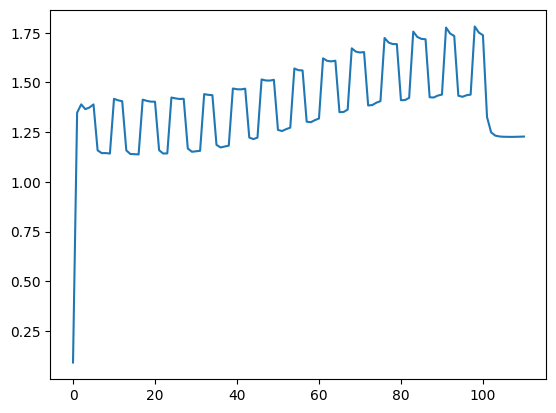

In [ ]:
plt.plot(scores[seq_to_plot][110].cpu())

In [ ]:
scores = attention._positional_encoder.apply_attention_scores_pe(scores)

In [ ]:
scores[0][0]

tensor([0.0672,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,
          -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,
          -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,
          -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,
          -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,
          -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,
          -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,
          -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,
          -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,
          -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,
          -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,
          -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,
          -inf,   -inf,   -inf,   -inf, 

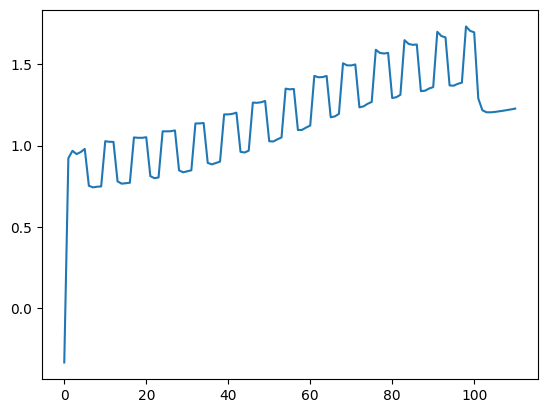

In [ ]:
plt.plot(scores[seq_to_plot][110].cpu())

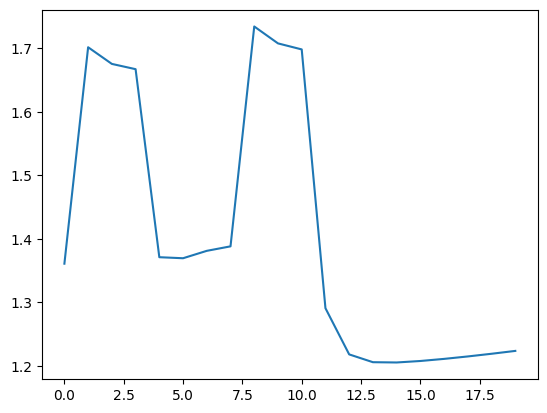

In [ ]:
plt.plot(scores[seq_to_plot][110][90:110].cpu())

In [ ]:
probs = torch.softmax(scores, dim=-1)

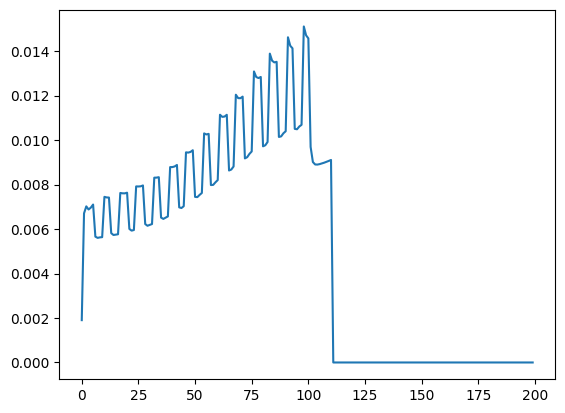

In [ ]:
plt.plot(probs[seq_to_plot][110].cpu())

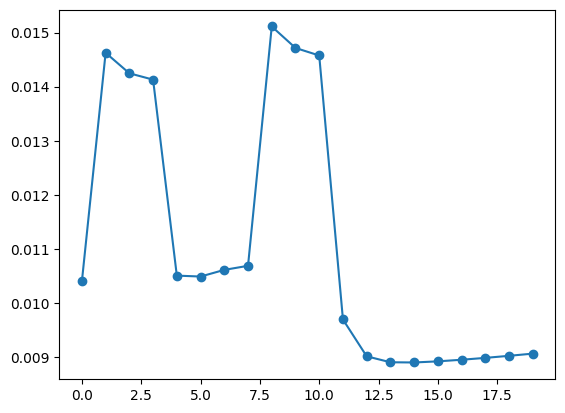

In [ ]:
plt.plot(probs[seq_to_plot][110].cpu()[90:110], "o-")

In [ ]:
pe = attention._positional_encoder
pe._m_activation(pe._m)

tensor([0.0039], device='cuda:0')

In [ ]:
torch.tril(torch.ones((5,5)), diagonal=-1).sum()

tensor([[0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 0.]])

In [ ]:
state_test = state['Break1_M0-100_FF_H0x']

In [ ]:
torch.cov(state_test)

RuntimeError: cov(): expected input to have two or fewer dimensions but got an input with 3 dimensions

In [ ]:
torch.pow(torch.tril(torch.cov(state_test[0].T), diagonal=-1), 2)

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.1114e-05, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [9.8914e-06, 2.5000e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [2.4983e-05, 1.1724e-05, 9.3635e-06, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [9.0999e-06, 2.8209e-03, 3.0559e-03, 8.4993e-06, 0.0000e+00, 0.0000e+00],
        [3.6368e-06, 3.3210e-02, 1.9540e-02, 2.7152e-06, 2.3258e-02, 0.0000e+00]],
       device='cuda:0')

In [ ]:
cov_sum = torch.empty(batch_size)

for i in range(batch_size):
    cov_sum[i] = torch.tril(torch.cov(state_test[i].T), diagonal=-1).sum()

-cov_sum.mean()

tensor(0.0112)

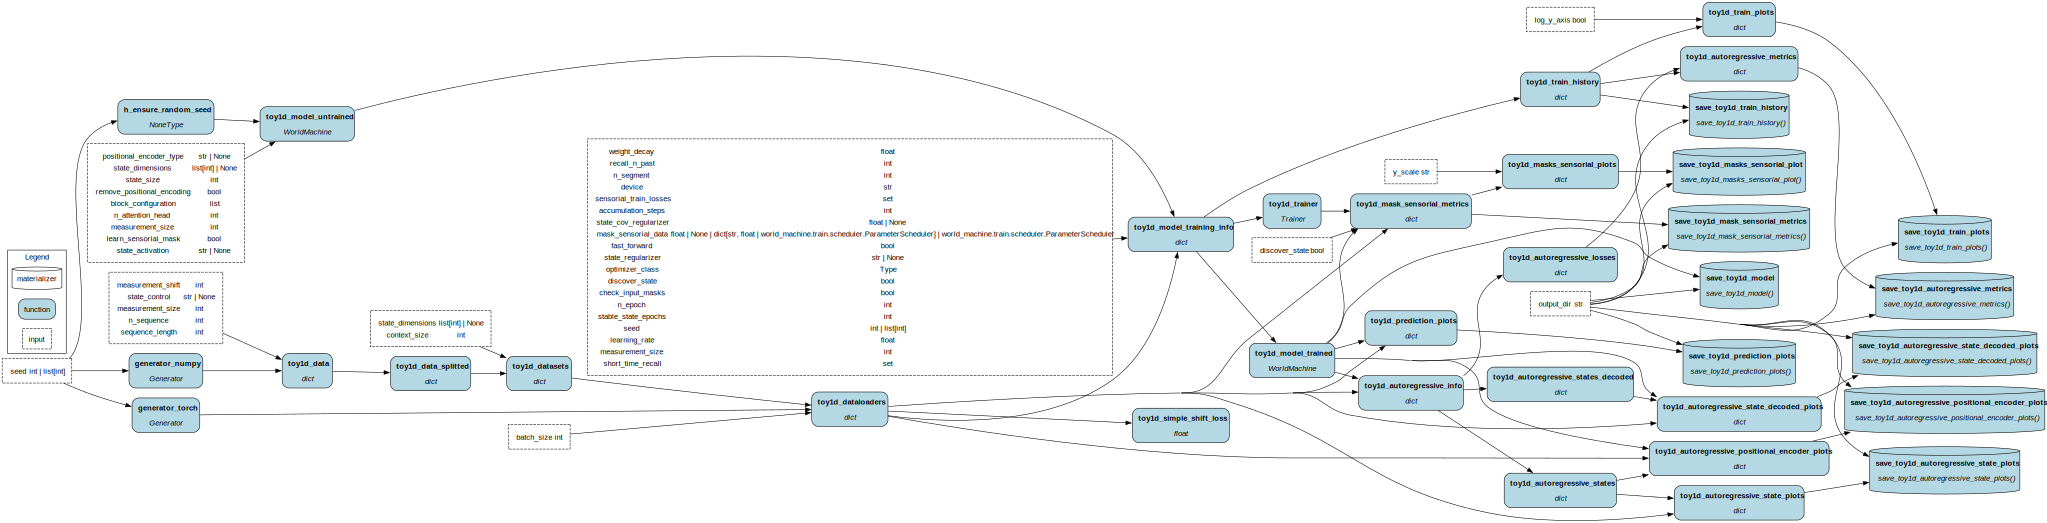

In [ ]:
from hamilton import driver

from world_machine_experiments.toy1d import base, multiple, parameter_variation
from world_machine_experiments import shared


d = driver.Builder().with_modules(base, shared).build()

d.display_all_functions(deduplicate_inputs=True)

In [ ]:
from world_machine_experiments.shared.load_train_history import load_train_history

In [ ]:
histories = load_train_history("toy1d_memory_long2", "toy1d_train_history")

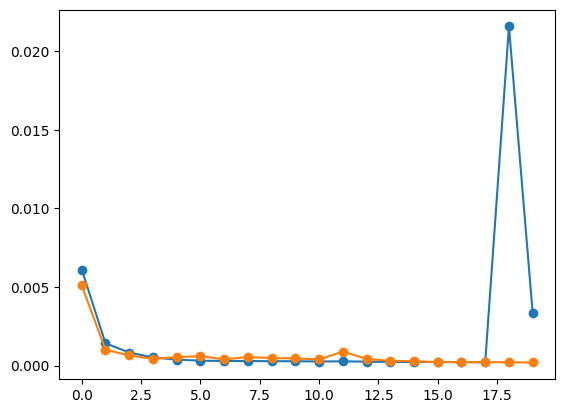

In [ ]:
plt.plot(histories["Break1_M0-100_FF_H0x_SS128_Alibi_SCheckSensorial_Head4"]["state_decoded_mse_first_train"], "o-")
plt.plot(histories["Break1_M0-100_FF_H0x_SS128_Alibi_SCheckSensorial_Head4_STR5-MD"]["state_decoded_mse_first_train"], "o-")

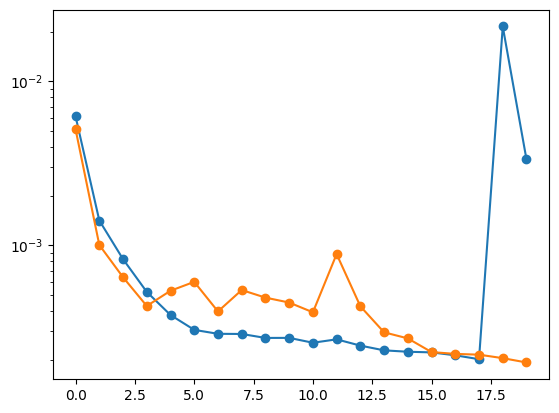

In [ ]:
plt.plot(histories["Break1_M0-100_FF_H0x_SS128_Alibi_SCheckSensorial_Head4"]["state_decoded_mse_first_train"], "o-")
plt.plot(histories["Break1_M0-100_FF_H0x_SS128_Alibi_SCheckSensorial_Head4_STR5-MD"]["state_decoded_mse_first_train"], "o-")
plt.yscale("log")

In [ ]:
a = histories["Break1_M0-100_FF_H0x_SS128_Alibi_SCheckSensorial_Head4"]["state_decoded_mse_first_train"]
b = a[1:]-a[:-1]

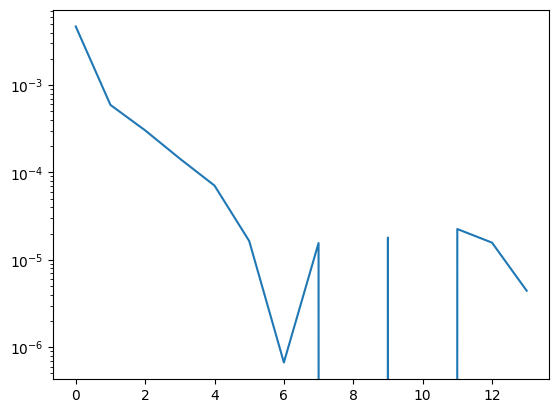

In [ ]:
plt.plot(-b[:-5])

plt.yscale("log")

In [ ]:
-b[:-5]

array([ 4.68828343e-03,  5.93008765e-04,  3.03425535e-04,  1.44012593e-04,
        7.08077278e-05,  1.64355442e-05,  6.68398570e-07,  1.55564921e-05,
       -2.00816430e-07,  1.79901253e-05, -1.24205253e-05,  2.25154217e-05,
        1.57376198e-05,  4.43083991e-06])

(0.0001, 0.0005)

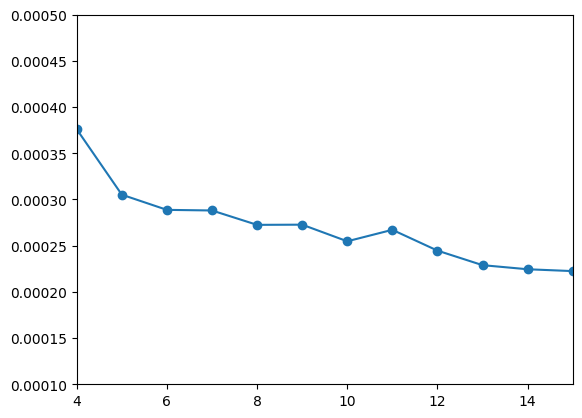

In [ ]:
plt.plot(histories["Break1_M0-100_FF_H0x_SS128_Alibi_SCheckSensorial_Head4"]["state_decoded_mse_first_train"], "o-")
plt.xlim(4, 15)
plt.ylim(1e-4, 5e-4)



In [ ]:
(a[5]-a[15])/(a[5])

0.27100897673053387

In [ ]:
a[15]/a[5]

0.7289910232694661

In [ ]:
a

array([0.00610473, 0.00141645, 0.00082344, 0.00052002, 0.000376  ,
       0.0003052 , 0.00028876, 0.00028809, 0.00027254, 0.00027274,
       0.00025475, 0.00026717, 0.00024465, 0.00022891, 0.00022448,
       0.00022248, 0.00021353, 0.00020223, 0.02157261, 0.00333752])